<a href="https://colab.research.google.com/github/vkjadon/tf/blob/main/tf117cnnEx-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl

%matplotlib inline
np.random.seed(1)

In [16]:
def load_happy_dataset():
    train_dataset = h5py.File('drive/MyDrive/datasets/happy/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('drive/MyDrive/datasets/happy/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [17]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print ("Y_test shape ORIGINAL : " + str(Y_test_orig.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)
Y_test shape ORIGINAL : (1, 150)


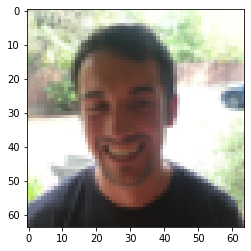

In [18]:
index = 12
#print(X_train)
#print(np.max(X_train[12]))
plt.imshow(X_train[index]) #display sample training image
plt.show()

### Exercise 1 - happyModel

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 
 
 **Hint:**
 
 Use **tfl** as shorthand for **tensorflow.keras.layers**

In [19]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    tf.keras.layers.ZeroPadding2D(padding=(1, 1), data_format=None, **kwargs)

    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
        
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
        
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(32, (7,7)),
        
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=-1),
        
            ## ReLU
            tfl.ReLU(),
        
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
        
            ## Flatten layer
            tfl.Flatten(),
        
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1, activation='sigmoid')
                                            
        ])
    
    return model

In [20]:
model = happyModel()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

In [21]:
model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 5s 115ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
38/38 [==============================] - 4s 113ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
38/38 [==============================] - 4s 111ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
38/38 [==============================] - 4s 112ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
38/38 [==============================] - 4s 113ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
38/38 [==============================] - 4s 112ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
38/38 [==============================] - 4s 114ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
38/38 [==============================] - 4s 113ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
38/38 [==============================] - 4s 112ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
38/38 [==============================] - 4s 115ms/step - loss: nan - accuracy: 

In [23]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 62ms/step - loss: nan - accuracy: 0.4400


[nan, 0.4399999976158142]